#**COLLABORATIVE FILTERING**



#1. **Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/Travelee'

/content/gdrive/.shortcut-targets-by-id/1KbFx6cgumQdIlBDxnOJK2fA3fhAODDuo/Travelee's Drawer


#2. **Data Understanding**

#2.1. Jumlah Data

In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
eco_place = pd.read_csv('eco_place.csv')
eco_rating = pd.read_csv('eco_rating.csv')

print('Jumlah places: ', len(eco_place.place_id.unique()))
print('Jumlah ratings: ', len(eco_rating.user_rating))

Jumlah places:  182
Jumlah ratings:  849


#2.2. Exploratory Data Analysis

In [ ]:
eco_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      849 non-null    int64
 1   place_id     849 non-null    int64
 2   user_rating  849 non-null    int64
dtypes: int64(3)
memory usage: 20.0 KB


In [ ]:
eco_rating.head()

,user_id,place_id,user_rating
0,1,28,2
1,1,86,4
2,1,94,4
3,1,146,3
4,2,17,2


In [ ]:
eco_rating.describe()

,user_id,place_id,user_rating
count,849.000000,849.000000,849.000000
mean,77.792697,89.064782,3.507656
std,44.226709,53.242054,0.948062
min,1.000000,2.000000,2.000000
25%,41.000000,43.000000,3.000000
50%,77.000000,87.000000,4.000000
75%,115.000000,134.000000,4.000000
max,156.000000,183.000000,5.000000


#3. **Data Preparation**

In [ ]:
eco_rating.isnull().sum()

user_id        0
place_id       0
user_rating    0
dtype: int64

In [ ]:
eco_rating = eco_rating.drop_duplicates()

In [ ]:
print(f'Jumlah data eco_rating yang duplikat: {eco_rating.duplicated().sum()}')

Jumlah data eco_rating yang duplikat: 0


#4. **MODEL DEVELOPMENT DENGAN COLLABORATIVE FILTERING**

## 4.1. Data Preparation

In [ ]:
user_id = eco_rating['user_id'].unique().tolist()
print('list User_Id: ', user_id)

user_to_num_encoded = {x: i for i, x in enumerate(user_id)}
print('encoded User_Id : ', user_to_num_encoded)

num_encoded_to_user = {i: x for i, x in enumerate(user_id)}
print('encoded num to User_Id: ', num_encoded_to_user)

list User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156]
encoded User_Id :  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38,

In [ ]:
places_id = eco_rating['place_id'].unique().tolist()
print('list places_id: ', places_id)

place_to_num_encoded = {x: i for i, x in enumerate(places_id)}
print('encoded places_id : ', place_to_num_encoded)

num_encoded_to_place = {i: x for i, x in enumerate(places_id)}
print('encoded num to places_id: ', num_encoded_to_place)

list places_id:  [28, 86, 94, 146, 17, 62, 64, 103, 137, 178, 63, 73, 92, 106, 132, 147, 5, 34, 78, 124, 53, 60, 72, 104, 109, 110, 42, 61, 81, 91, 32, 57, 67, 68, 9, 145, 154, 170, 41, 74, 160, 46, 50, 71, 87, 162, 15, 18, 21, 56, 77, 134, 47, 128, 143, 156, 174, 14, 35, 54, 164, 173, 20, 48, 125, 130, 176, 3, 58, 114, 172, 11, 153, 117, 25, 107, 127, 29, 161, 181, 97, 100, 175, 90, 93, 101, 10, 98, 144, 102, 19, 89, 23, 38, 150, 133, 83, 149, 120, 37, 96, 119, 152, 8, 16, 116, 121, 43, 75, 105, 111, 168, 26, 55, 122, 179, 148, 7, 113, 167, 59, 24, 131, 163, 6, 2, 84, 159, 12, 39, 49, 141, 30, 151, 40, 135, 76, 177, 112, 82, 108, 126, 13, 27, 22, 65, 180, 51, 4, 182, 44, 79, 166, 80, 66, 52, 155, 171, 33, 45, 95, 118, 69, 142, 165, 70, 138, 88, 129, 139, 31, 115, 183, 99, 123, 136, 158, 85, 36, 157, 140, 169]
encoded places_id :  {28: 0, 86: 1, 94: 2, 146: 3, 17: 4, 62: 5, 64: 6, 103: 7, 137: 8, 178: 9, 63: 10, 73: 11, 92: 12, 106: 13, 132: 14, 147: 15, 5: 16, 34: 17, 78: 18, 124: 19,

In [ ]:
eco_rating['user'] = eco_rating['user_id'].map(user_to_num_encoded)
eco_rating['place'] = eco_rating['place_id'].map(place_to_num_encoded)

In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
num_users = len(user_to_num_encoded)
num_places = len(num_encoded_to_place)

eco_rating['rating'] = eco_rating['user_rating'].values.astype(np.float32)

min_rating = min(eco_rating['rating'])
max_rating = max(eco_rating['rating'])

print(f'Number of users: {num_users}')
print(f'Number of places: {num_places}')
print(f'Min rating: {min_rating}')
print(f'Max rating: {max_rating}')

Number of users: 156
Number of places: 182
Min rating: 2.0
Max rating: 5.0


## 4.2. Split Training Data dan Validation Data

In [ ]:
eco_rating = eco_rating.sample(frac=1, random_state=42)
eco_rating

,user_id,place_id,user_rating,user,place,rating
39,7,104,4,6,23,4.0
251,48,12,4,47,128,4.0
315,58,90,3,57,83,3.0
97,19,11,2,18,71,2.0
199,39,86,3,38,1,3.0
...,...,...,...,...,...,...
72,13,81,4,12,28,4.0
107,21,93,5,20,84,5.0
271,51,20,5,50,62,5.0
436,79,105,3,78,109,3.0


In [ ]:
x = eco_rating[['user', 'place']].values
y = eco_rating['rating'].apply(lambda x: (
    x - min_rating) / (max_rating - min_rating)).values

train_data = int(0.8 * eco_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_data],
    x[train_data:],
    y[:train_data],
    y[train_data:]
)

print(x, y)

[[  6  23]
 [ 47 128]
 [ 57  83]
 ...
 [ 50  62]
 [ 78 109]
 [ 19  81]] [0.66666667 0.66666667 0.33333333 0.         0.33333333 0.33333333
 0.33333333 0.         0.33333333 0.66666667 1.         0.66666667
 0.         1.         0.66666667 0.33333333 0.66666667 0.66666667
 0.33333333 0.66666667 0.66666667 0.66666667 0.66666667 0.33333333
 0.         0.33333333 0.66666667 0.         0.66666667 0.
 0.66666667 0.66666667 0.66666667 0.         0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 1.
 0.         0.         0.33333333 0.33333333 0.66666667 0.
 0.66666667 0.66666667 0.         0.33333333 0.66666667 0.33333333
 0.33333333 0.         0.33333333 0.         0.33333333 0.66666667
 0.33333333 0.33333333 0.66666667 0.         0.33333333 0.66666667
 0.33333333 0.66666667 0.33333333 0.66666667 1.         0.66666667
 0.66666667 0.33333333 0.66666667 1.         0.33333333 1.
 0.33333333 1.         0.33333333 0.         0.66666667 0.33333333
 0.66666667 0.33333333

### 4.3. Model Development

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.place_embedding = layers.Embedding(
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.place_bias = layers.Embedding(num_places, 1)
    
  def call(self, inputs):
    vector_users = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    vector_places = self.place_embedding(inputs[:, 1])
    place_bias = self.place_bias(inputs[:, 1])
    
    dot_user_place = tf.tensordot(vector_users, vector_places, 2) 
    
    x = dot_user_place + user_bias + place_bias
    
    return tf.nn.sigmoid(x)

In [ ]:
model = RecommenderNet(num_users, num_places, 16)

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
model.build(input_shape = (None, 182,182,3))
model.summary()

Model: "recommender_net_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     multiple                  2496      
                                                                 
 embedding_9 (Embedding)     multiple                  156       
                                                                 
 embedding_10 (Embedding)    multiple                  2912      
                                                                 
 embedding_11 (Embedding)    multiple                  182       
                                                                 
Total params: 5,746
Trainable params: 5,746
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping

callbacks = EarlyStopping(
    min_delta=0.0001,
    patience=5,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=5,
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks = [callbacks]
)

Epoch 1/50
136/136 [==============================] - 1s 3ms/step - loss: 0.0987 - root_mean_squared_error: 0.3141 - val_loss: 0.1049 - val_root_mean_squared_error: 0.3239
Epoch 2/50
136/136 [==============================] - 0s 2ms/step - loss: 0.0981 - root_mean_squared_error: 0.3132 - val_loss: 0.1049 - val_root_mean_squared_error: 0.3239
Epoch 3/50
136/136 [==============================] - 0s 2ms/step - loss: 0.0982 - root_mean_squared_error: 0.3133 - val_loss: 0.1049 - val_root_mean_squared_error: 0.3239
Epoch 4/50
136/136 [==============================] - 0s 2ms/step - loss: 0.0982 - root_mean_squared_error: 0.3133 - val_loss: 0.1049 - val_root_mean_squared_error: 0.3239
Epoch 5/50
136/136 [==============================] - 0s 2ms/step - loss: 0.0972 - root_mean_squared_error: 0.3117 - val_loss: 0.1049 - val_root_mean_squared_error: 0.3239
Epoch 6/50
136/136 [==============================] - 0s 2ms/step - loss: 0.0974 - root_mean_squared_error: 0.3121 - val_loss: 0.1049 - val_

In [ ]:
model.evaluate(x_val, y_val)

6/6 [==============================] - 0s 2ms/step - loss: 0.1096 - root_mean_squared_error: 0.3311


[0.10959891974925995, 0.3310563266277313]

In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


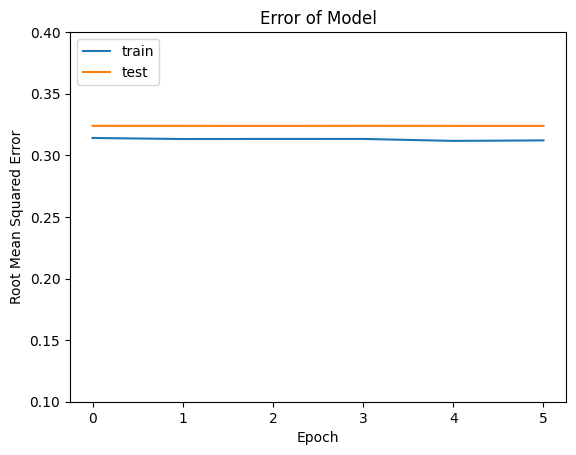

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Error of Model')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0.1,0.4)
plt.show()

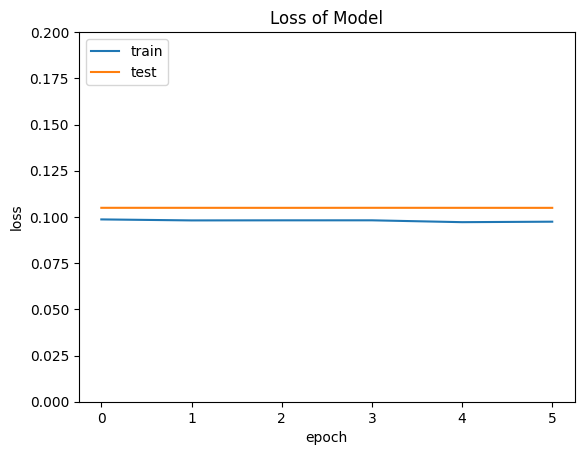

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0,0.2)
plt.show()

In [ ]:
model.save('model_saved', save_format = 'tf')

## 4.4. Recomendation Testing

In [ ]:
df_places = eco_place
df_ratings = eco_rating

In [ ]:
user_id = df_ratings.user_id.sample(1).iloc[0]
place_rated = df_ratings[df_ratings.user_id == user_id]

place_not_rated = df_places[~df_places['place_id'].isin(
    place_rated.place_id.values)]['place_id']
place_not_rated = list(
    set(place_not_rated).intersection(set(place_to_num_encoded.keys()))
)

place_not_rated = [
    [place_to_num_encoded.get(x)] for x in place_not_rated]
user_encoder = user_to_num_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_rated), place_not_rated)
)

In [ ]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    num_encoded_to_place.get(place_not_rated[x][0]) for x in top_ratings_indices
]

print('Recommendations for user: {}'.format(user_id))
print('=====' * 8)
print('Place with high ratings from user')
print('-----' * 8)

top_place_user = (
    place_rated.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .place_id.values
)

rows_df_places = df_places[df_places['place_id'].isin(top_place_user)]
for row in rows_df_places.itertuples():
    print(row.place_name + ':', row.category)

print('-----' * 8)
print('Top 10 recommended places')
print('-----' * 8)

recommended_places = df_places[df_places['place_id'].isin(recommended_place_ids)]
for row in recommended_places.itertuples():
    print(row.place_name + ':', row.category)

6/6 [==============================] - 0s 4ms/step
Recommendations for user: 122
Place with high ratings from user
----------------------------------------
Sungai Palayangan: Cagar Alam
Taman Wisata Alam Gunung Pancar: Cagar Alam
Taman Nasional Meru Betiri: Budaya,Cagar Alam,Taman Nasional
Desa Wisata Sungai Code Jogja Kota: Budaya,Taman Hiburan
Pantai Sadranan: Bahari,Cagar Alam
----------------------------------------
Top 10 recommended places
----------------------------------------
Pantai Samas : Bahari,Cagar Alam
Pantai Sedahan: Bahari,Cagar Alam
Pantai Siung: Bahari,Cagar Alam
Pantai Timang: Bahari,Cagar Alam
Pantai Wediombo: Bahari,Cagar Alam
Puncak Kebun Buah Mangunan: Cagar Alam,Taman Hiburan
Seribu Batu Songgo Langit: Budaya,Cagar Alam
Studio Alam Gamplong: Taman Hiburan
Watu Goyang: Budaya,Cagar Alam
Watu Lumbung: Cagar Alam


In [ ]:
def recommend_places(user_id, model, df_ratings, df_places, user_to_num_encoded, num_encoded_to_place, place_to_num_encoded):
    place_rated = df_ratings[df_ratings.user_id == user_id]
    
    place_not_rated = df_places[~df_places['place_id'].isin(place_rated.place_id.values)]['place_id']
    place_not_rated = list(set(place_not_rated).intersection(set(place_to_num_encoded.keys())))
    
    place_not_rated = [[place_to_num_encoded.get(x)] for x in place_not_rated]
    user_encoder = user_to_num_encoded.get(user_id)
    user_place_array = np.hstack(([[user_encoder]] * len(place_not_rated), place_not_rated))
    
    ratings = model.predict(user_place_array).flatten()
    
    top_ratings_indices = ratings.argsort()[-10:][::-1]
    recommended_place_ids = [num_encoded_to_place.get(place_not_rated[x][0]) for x in top_ratings_indices]
    
    print('Recommendations for user: {}'.format(user_id))
    print('=====' * 13)
    print('Place with high ratings from user')
    print('-----' * 13)
    
    top_place_user = (place_rated.sort_values(by='rating', ascending=False)
                      .head(5)
                      .place_id.values)
    
    rows_df_places = df_places[df_places['place_id'].isin(top_place_user)]
    for row in rows_df_places.itertuples():
        print(row.place_name + ':', row.category)
    
    print('-----' * 13)
    print('Top 10 recommended places')
    print('-----' * 13)
    
    recommended_places = df_places[df_places['place_id'].isin(recommended_place_ids)]
    for row in recommended_places.itertuples():
        print(row.place_name + ':', row.category)


In [ ]:
recommend_places(df_ratings.user_id.sample(1).iloc[0], model, df_ratings, df_places, user_to_num_encoded, num_encoded_to_place, place_to_num_encoded)


6/6 [==============================] - 0s 2ms/step
Recommendations for user: 72
Place with high ratings from user
-----------------------------------------------------------------
Taman Kupu-Kupu Cihanjuang: Budaya,Cagar Alam
Candi Gedong Songo: Budaya
Goa Cerme: Budaya,Cagar Alam
Pantai Greweng: Bahari,Cagar Alam
Pantai Watu Kodok: Bahari,Cagar Alam
-----------------------------------------------------------------
Top 10 recommended places
-----------------------------------------------------------------
Taman Nasional Kutai: Cagar Alam,Taman Nasional
Air Terjun Semirang: Cagar Alam
Desa Wisata Lembah Kalipancur: Desa Wisata,Taman Hiburan
Durian Gardens and Tourism Education Watu Simbar: Budaya,Cagar Alam
Goa Rong: Budaya,Cagar Alam
Kampoeng Rawa: Cagar Alam
Waduk Jatibarang Mijen: Cagar Alam
Wisata Mangrove Tapak: Budaya,Cagar Alam
Taman Nasional Kerinci Seblat: Taman Nasional,Cagar Alam
Danau Toba: Budaya,Cagar Alam,Desa Wisata
